#                                     Capital Asset Pricing Model

## Objectives:
### 1. Calculate alpha & beta for each stock
### 2. Calculate portfolio returns

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
stocks_df = pd.read_csv('D:\MLR\Part 2. Financial Analysis in Python\stock.csv')
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [4]:
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [5]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

## CALCULATING DAILY RETURNS

In [6]:
# Function to calculate the daily returns 
def daily_return(df):

  df_daily_return = df.copy()
  
  # Loop through each stock
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):
      
      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [7]:
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


## CALCULATING BETA FOR A SINGLE STOCK

In [8]:
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [9]:
stocks_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

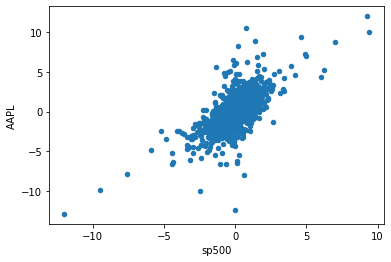

In [ ]:
# plotting a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [10]:
# Beta represents the slope of the line regression line (market return vs. stock return). 
# It is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# It is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))  

Beta for AAPL stock is = 1.1128924148678094 and alpha is = 0.052812084694402545


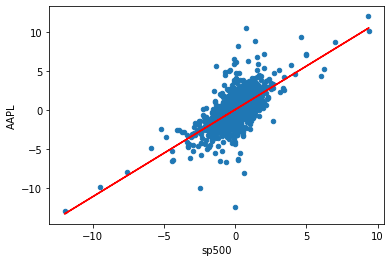

In [11]:
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters 

plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


## APPLYING THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [12]:
beta

1.1128924148678094

In [13]:
# average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.049316006600389206

In [14]:
# annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.42763366329808

In [15]:
# Assume risk free rate is zero
rf = 0 

# Calculating the return for any security (APPL) using CAPM  
ER_AAPL = rf + ( beta * (rm-rf) ) 

In [16]:
ER_AAPL

13.830619238640281

## CALCULATING BETA FOR ALL STOCKS

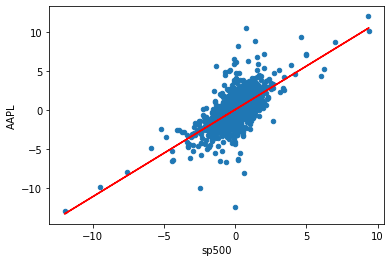

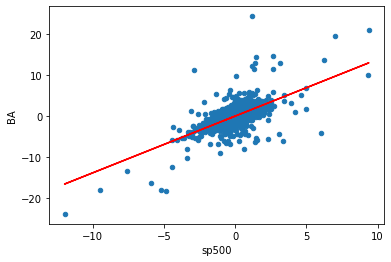

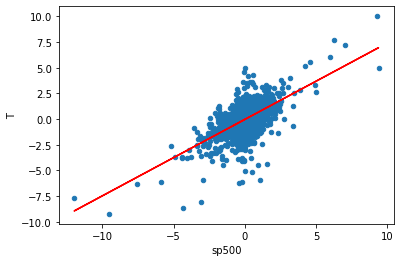

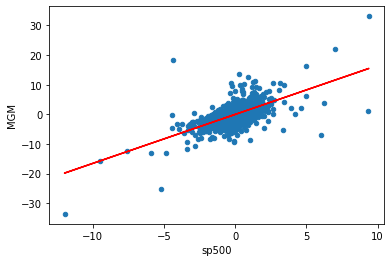

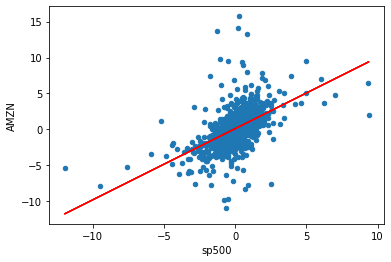

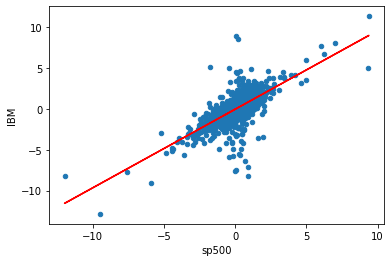

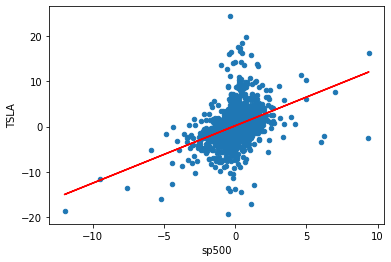

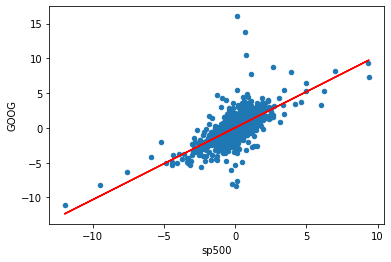

In [17]:
# create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [18]:
# Beta for every stock 
beta

{'AAPL': 1.1128924148678094,
 'BA': 1.3828672010892782,
 'T': 0.7446293454747842,
 'MGM': 1.6535677065180108,
 'AMZN': 0.9917345712576846,
 'IBM': 0.9604149148095248,
 'TSLA': 1.2686150101095912,
 'GOOG': 1.034881768742856}

In [ ]:
# Alpha for each of the stocks
# It describes the strategy's ability to beat the market (S&P500)
# It indicates the “excess return” or “abnormal rate of return,” 

alpha

{'AAPL': 0.052812084694402864,
 'AMZN': 0.1022139641776522,
 'BA': -0.0022906983297531543,
 'GOOG': 0.03335558721467005,
 'IBM': -0.053454941504451084,
 'MGM': -0.016885305520478674,
 'T': -0.028563430198461616,
 'TSLA': 0.1758349216516583}

## APPLYING CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [19]:
# Obtaining a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [ ]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market 
rm

12.42763366329808

In [ ]:
for i in keys:
  # Calculating the return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [ ]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640287%
Expected Return Based on CAPM for BA is 17.1857669801279%
Expected Return Based on CAPM for T is 9.253980720502046%
Expected Return Based on CAPM for MGM is 20.54993369406583%
Expected Return Based on CAPM for AMZN is 12.324913942818489%
Expected Return Based on CAPM for IBM is 11.935684726020403%
Expected Return Based on CAPM for TSLA is 15.765882605403183%
Expected Return Based on CAPM for GOOG is 12.861131506762176%


In [ ]:
# Assuming equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [ ]:
# Calculating portfolio return 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792537

In [ ]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 14.213489176792537%

